In [1]:
# import everything as needed
%matplotlib inline
# %matplotlib notebook

import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D, axes3d
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import math

from operator import itemgetter

from irkit.trec import qrels
from irkit.trec import results
from irkit.trec import run

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

#Set general plot properties
sns.set()
sns.set_context("paper")
sns.set_color_codes("pastel")

sns.set_context({"figure.figsize": (16, 10)})
plt.style.use('grayscale')
plt.style.use('seaborn-white')

In [2]:
def fill_empty_row(df):
    topic_not_found = set()
    for i in range(1, 101):
        topic_not_found.add(i)

    for row in df.iterrows():
        topic_not_found.remove(row[0])
        
    num_colls = len(df.columns)
    for row in topic_not_found: 
        df.loc[row] = (0) * num_colls
        
runs = ['plmp', 'plms']

proportion = list(range(1,12))
smoothing = list(range(1,11))
results = {}
for run in runs:
    z = []
    for p in proportion:
        z_i = []
        for s in smoothing:
            with open('res-files/{}{}_{}_standard.csv'.format(run, p, s), 'r') as f:
                df = pd.DataFrame.from_csv(f)
                fill_empty_row(df)
                z_i.append(np.mean(df[' map'].round(4)))
        z.append(z_i)
    results[run] = z

In [3]:
x = np.array([[x]*10 for x in np.arange(0.0,1.1,0.1)])
y = np.array([list(np.arange(0.1,1.1,0.1))] * 11)
zs = np.array(results['plms'])
zp = np.array(results['plmp'])

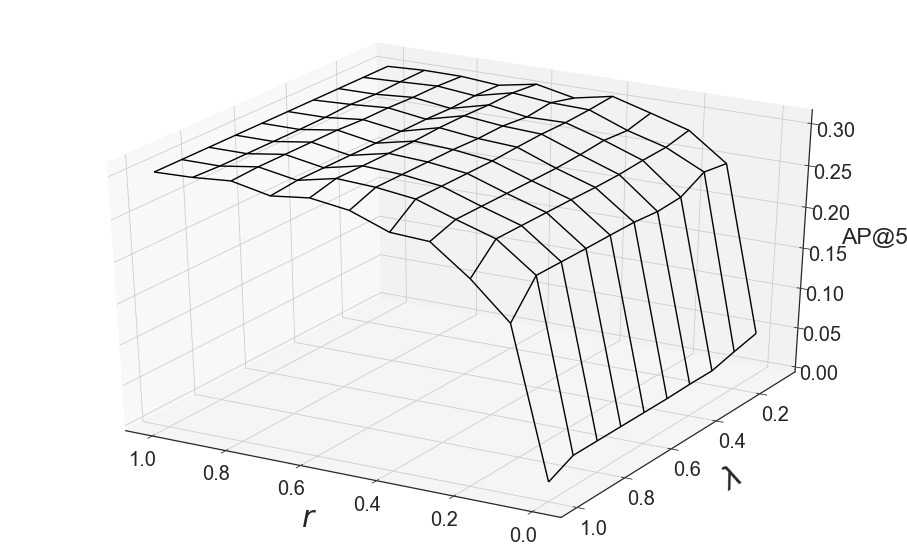

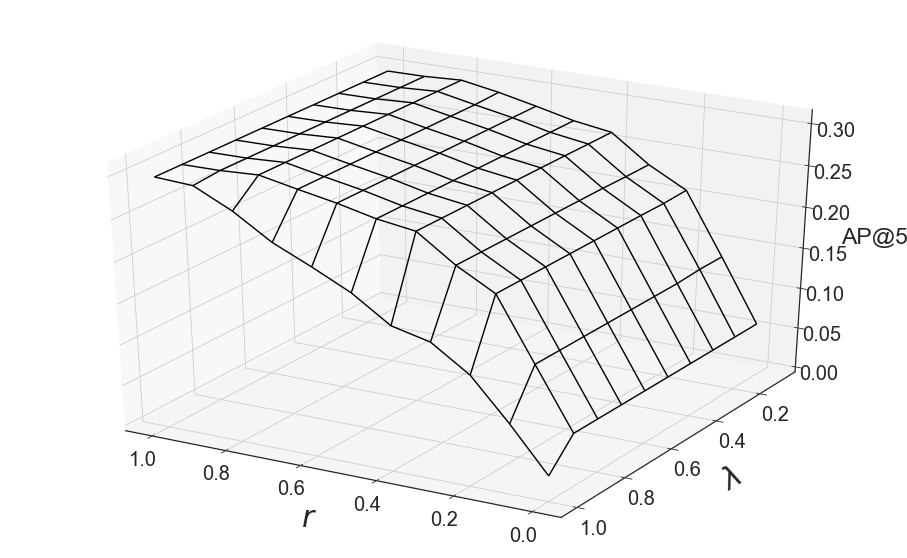

In [4]:
# Generate the 3d plots for AP@5 for differing proportions (r) and differing smoothing paramter (lambda) 
# values for PLM

# Paragraph
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(x, y, zp, cmap=cm.gray)
ax.set_ylabel("$\lambda$",fontsize=30, labelpad=21)
ax.set_xlabel("$r$",fontsize=30, labelpad=21)
ax.set_zlabel("AP@5",fontsize=23, labelpad=19)
ax.view_init(30,120)
ax.set_zlim3d((0.0,0.31))
ax.tick_params(labelsize=20)
plt.show()

# Sentence
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(x, y, zs, cmap=cm.gray)
ax.set_ylabel("$\lambda$",fontsize=30, labelpad=21)
ax.set_xlabel("$r$",fontsize=30, labelpad=21)
ax.set_zlabel("AP@5",fontsize=23, labelpad=19)
ax.view_init(30,120)
ax.set_zlim3d((0.0,0.31))
ax.tick_params(labelsize=20)
plt.show()